In [1]:
using Plots
default(fmt=:png)

In [2]:
ϕ = (1 + √5) / 2

1.618033988749895

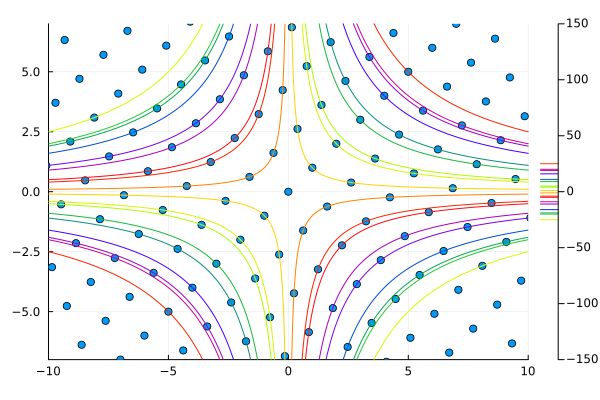

In [3]:
z = [(a+b*ϕ, a-b/ϕ) for a in -100:100 for b in -100:100]
scatter(z; label="")
plot!(xlim=(-10, 10), ylim=(-7, 7))
x, y = range(-15, 15, 300), range(-10, 10, 200)
contour!(x, y, (x, y) -> x*y;
    levels=[-1, 1, -4, 4, -5, 5, -9, 9, -11, 11, -16, 16, -19, 19, -20, 20, -25, 25],
    c=:prism,
    #colorbar=false
)
plot!(aspectratio=1)

In [4]:
round.(Int, prod.(z)) .|> abs |> sort |> unique |> show

[0, 1, 4, 5, 9, 11, 16, 19, 20, 25, 29, 31, 36, 41, 44, 45, 49, 55, 59, 61, 64, 71, 76, 79, 80, 81, 89, 95, 99, 100, 101, 109, 116, 121, 124, 125, 131, 139, 144, 145, 149, 151, 155, 164, 169, 171, 176, 179, 180, 181, 191, 196, 199, 205, 209, 211, 220, 225, 229, 236, 239, 241, 244, 245, 251, 256, 261, 269, 271, 275, 279, 281, 284, 289, 295, 304, 305, 311, 316, 319, 320, 324, 331, 341, 349, 355, 356, 359, 361, 369, 379, 380, 389, 395, 396, 400, 401, 404, 405, 409, 419, 421, 431, 436, 439, 441, 445, 449, 451, 461, 464, 475, 479, 484, 491, 495, 496, 499, 500, 505, 509, 521, 524, 529, 531, 539, 541, 545, 549, 551, 556, 569, 571, 576, 580, 589, 596, 599, 601, 604, 605, 619, 620, 625, 631, 639, 641, 649, 655, 656, 659, 661, 671, 676, 684, 691, 695, 701, 704, 709, 711, 716, 719, 720, 724, 725, 729, 739, 745, 751, 755, 761, 764, 769, 775, 779, 781, 784, 796, 801, 809, 811, 820, 821, 829, 836, 839, 841, 844, 845, 855, 859, 869, 880, 881, 891, 895, 899, 900, 905, 909, 911, 916, 919, 929, 931, 941

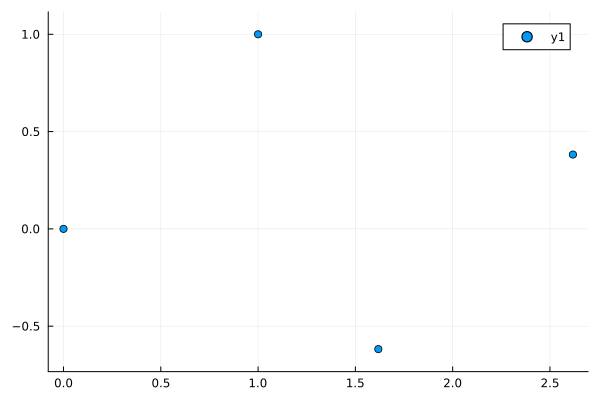

In [5]:
o = [0, 0]
a = [1, 1]
b = [ϕ, -1/ϕ]
scatter(Tuple.([o, a, b, a+b]))
plot!(aspectratio=1)

In [6]:
binom(n, k) = binomial(big(n), big(k))
binom(100, 50)

100891344545564193334812497256

In [7]:
ε = 1//10
for n in (100, 200, 400, 800)
    Nall = big(2)^n
    N = sum(binom(n, k) for k in 0:n if abs(k//n - 1//2) ≥ ε)
    @show n Nall N N/Nall 1/(4.0n*ε)
    println()
end

n = 100
Nall = 1267650600228229401496703205376
N = 72114023225732984196677525200
N / Nall = 0.05688793364098079167036430312727704623842177207740735973146017911972194269765168
1 / ((4.0n) * ε) = 0.025

n = 200
Nall = 1606938044258990275541962092341162602522202993782792835301376
N = 9135693458725205785139621900872872354090930906604995207056
N / Nall = 0.005685155996750305120688412945463359081185066307863661220198622975754103789682623
1 / ((4.0n) * ε) = 0.0125

n = 400
Nall = 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747493376
N = 191772545098173751462678057727948394229084415988436907802147491600948603274878895108361899411367950810264577246911376
N / Nall = 7.426568076372639328581115366041119074377583924917357607892984605085076584533221e-05
1 / ((4.0n) * ε) = 0.00625

n = 800
Nall = 6668014432879854274079851790721257797144758322315908160396257811764037237817632071521432200871554290742929910593433240445888801654119365080

In [8]:
ENV["LINES"] = 100
ENV["COLUMNS"] = 200

200

In [9]:
n = 10^4
A = [abs(a^2 - 5b^2) for a in 0:n for b in 0:n] |> sort |> unique
@show A[A .≤ 100];

A[A .≤ 100] = [0, 1, 4, 5, 9, 11, 16, 19, 20, 25, 29, 31, 36, 41, 44, 45, 49, 55, 59, 61, 64, 71, 76, 79, 80, 81, 89, 95, 99, 100]


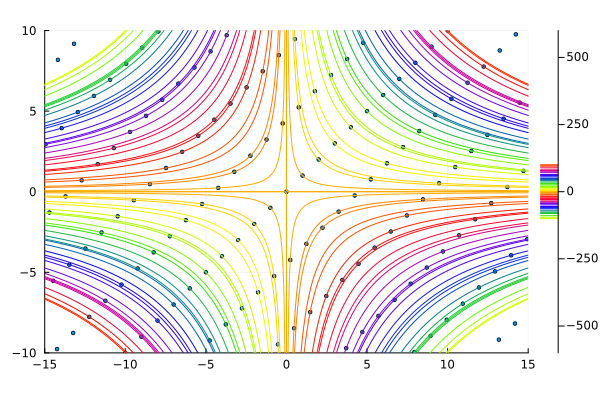

In [10]:
z = [(a+b*√5, a-b*√5) for a in -100:100 for b in -100:100]
scatter(z; label="", ms=2, mc=:auto)
plot!(xlim=(-15, 15), ylim=(-10, 10))
x, y = range(-30, 30, 300), range(-20, 20, 200)
contour!(x, y, (x, y) -> x*y;
    levels=[A[A .≤ 100]; -A[A .≤ 100]],
    c=:prism,
    #colorbar=false
)
plot!(aspectratio=1)

In [11]:
@show A[A .< 1000];

A[A .< 1000] = [0, 1, 4, 5, 9, 11, 16, 19, 20, 25, 29, 31, 36, 41, 44, 45, 49, 55, 59, 61, 64, 71, 76, 79, 80, 81, 89, 95, 99, 100, 101, 109, 116, 121, 124, 125, 131, 139, 144, 145, 149, 151, 155, 164, 169, 171, 176, 179, 180, 181, 191, 196, 199, 205, 209, 211, 220, 225, 229, 236, 239, 241, 244, 245, 251, 256, 261, 269, 271, 275, 279, 281, 284, 289, 295, 304, 305, 311, 316, 319, 320, 324, 331, 341, 349, 355, 356, 359, 361, 369, 379, 380, 389, 395, 396, 400, 401, 404, 405, 409, 419, 421, 431, 436, 439, 441, 445, 449, 451, 461, 464, 475, 479, 484, 491, 495, 496, 499, 500, 505, 509, 521, 524, 529, 531, 539, 541, 545, 549, 551, 556, 569, 571, 576, 580, 589, 596, 599, 601, 604, 605, 619, 620, 625, 631, 639, 641, 649, 655, 656, 659, 661, 671, 676, 684, 691, 695, 701, 704, 709, 711, 716, 719, 720, 724, 725, 729, 739, 745, 751, 755, 761, 764, 769, 775, 779, 781, 784, 796, 801, 809, 811, 820, 821, 829, 836, 839, 841, 844, 845, 855, 859, 869, 880, 881, 891, 895, 899, 900, 905, 909, 911, 916, 919

In [12]:
B = [N for N in 0:5n^2 if !(
                mod(N, 5) == 2 || mod(N, 5) == 3
                || (mod(N, 2) == 0 && mod(N, 4) != 0)
                || (mod(N, 3) == 0 && mod(N, 9) != 0)
                || (mod(N, 7) == 0 && mod(N, 49) != 0)
                || (mod(N, 8) == 0 && mod(N, 16) != 0)
                )]
@show B[B .≤ 100]
@show A[A .≤ 100];

B[B .≤ 100] = [0, 1, 4, 5, 9, 11, 16, 19, 20, 25, 29, 31, 36, 41, 44, 45, 49, 55, 59, 61, 64, 65, 71, 76, 79, 80, 81, 85, 89, 95, 99, 100]
A[A .≤ 100] = [0, 1, 4, 5, 9, 11, 16, 19, 20, 25, 29, 31, 36, 41, 44, 45, 49, 55, 59, 61, 64, 71, 76, 79, 80, 81, 89, 95, 99, 100]


In [13]:
setdiff(A, B)

Int64[]

In [14]:
C = setdiff(B, A)
@show C[C .≤ 100];

C[C .≤ 100] = [65, 85]


In [15]:
@show C[C .≤ 1000];

C[C .≤ 1000] = [65, 85, 115, 135, 160, 185, 215, 221, 235, 260, 265, 299, 325, 335, 340, 351, 365, 391, 415, 416, 425, 459, 460, 481, 485, 515, 535, 540, 544, 559, 565, 575, 585, 611, 621, 629, 635, 640, 675, 685, 689, 715, 731, 736, 740, 765, 785, 799, 800, 815, 835, 851, 860, 864, 865, 871, 884, 901, 925, 935, 940, 949, 965, 985, 989, 999]


In [16]:
p = 2
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 1]


2×2 BitMatrix:
 1  0
 0  1

In [17]:
p = 3
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 1, 1]


3×3 BitMatrix:
 1  0  0
 0  0  0
 0  0  0

In [18]:
p = 5
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 0, 0, 0, 0]


5×5 BitMatrix:
 1  1  1  1  1
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

In [19]:
p = 7
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 2, 2, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 2, 1, 4, 4, 1, 2]


7×7 BitMatrix:
 1  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

In [20]:
p = 8
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 1, 0, 1, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 3, 4, 3, 0, 3, 4, 3]


8×8 BitMatrix:
 1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0
 1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0

In [21]:
p = 11
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 5, 3, 3, 5, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 6, 2, 10, 8, 7, 7, 8, 10, 2, 6]


11×11 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  0  0
 0  0  0  0  0  1  1  0  0  0  0
 0  0  1  0  0  0  0  0  0  1  0
 0  1  0  0  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  1  0  0  0
 0  0  0  0  1  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0  0  1
 0  0  1  0  0  0  0  0  0  1  0
 0  0  0  0  0  1  1  0  0  0  0
 0  0  0  1  0  0  0  0  1  0  0

In [22]:
p = 13
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 3, 12, 10, 10, 12, 3, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 8, 6, 7, 11, 5, 2, 2, 5, 11, 7, 6, 8]


13×13 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0

In [23]:
p = 17
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 8, 2, 15, 13, 13, 15, 2, 8, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 12, 14, 6, 5, 11, 7, 10, 3, 3, 10, 7, 11, 5, 6, 14, 12]


17×17 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [24]:
p = 19
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 6, 17, 11, 7, 5, 5, 7, 11, 17, 6, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 14, 18, 12, 15, 8, 10, 2, 3, 13, 13, 3, 2, 10, 8, 15, 12, 18, 14]


19×19 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  1

In [25]:
p = 23
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 2, 13, 3, 18, 12, 8, 6, 6, 8, 12, 18, 3, 13, 2, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 18, 3, 1, 12, 13, 4, 8, 2, 9, 6, 16, 16, 6, 9, 2, 8, 4, 13, 12, 1, 3, 18]


23×23 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0

In [26]:
p = 29
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 25, 7, 20, 6, 23, 13, 5, 28, 24, 22, 22, 24, 28, 5, 13, 23, 6, 20, 7, 25, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 24, 9, 13, 7, 20, 23, 16, 28, 1, 22, 4, 5, 25, 6, 6, 25, 5, 4, 22, 1, 28, 16, 23, 20, 7, 13, 9, 24]


29×29 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0

In [27]:
p = 31
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 25, 5, 18, 2, 19, 7, 28, 20, 14, 10, 8, 8, 10, 14, 20, 28, 7, 19, 2, 18, 5, 25, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 26, 11, 17, 13, 30, 6, 3, 21, 29, 27, 15, 24, 23, 12, 22, 22, 12, 23, 24, 15, 27, 29, 21, 3, 6, 30, 13, 17, 11, 26]


31×31 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0

In [28]:
p = 37
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 25, 36, 12, 27, 7, 26, 10, 33, 21, 11, 3, 34, 30, 28, 28, 30, 34, 3, 11, 21, 33, 10, 26, 7, 27, 12, 36, 25, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 32, 17, 29, 31, 23, 5, 14, 13, 2, 18, 24, 20, 6, 19, 22, 15, 35, 8, 8, 35, 15, 22, 19, 6, 20, 24, 18, 2, 13, 14, 5, 23, 31, 29, 17, 32]


37×37 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [29]:
p = 41
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 16, 25, 36, 8, 23, 40, 18, 39, 21, 5, 32, 20, 10, 2, 37, 33, 31, 31, 33, 37, 2, 10, 20, 32, 5, 21, 39, 18, 40, 23, 8, 36, 25, 16, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 36, 21, 37, 2, 39, 25, 1, 8, 5, 33, 10, 18, 16, 4, 23, 32, 31, 20, 40, 9, 9, 40, 20, 31, 32, 23, 4, 16, 18, 10, 33, 5, 8, 1, 25, 39, 2, 37, 21, 36]


41×41 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0

In [30]:
p = 2
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 1]


2×2 BitMatrix:
 1  0
 0  1

In [31]:
p = 4
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 0, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 3, 0, 3]


4×4 BitMatrix:
 1  0  1  0
 0  1  0  1
 1  0  1  0
 0  1  0  1

In [32]:
p = 8
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 1, 0, 1, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 3, 4, 3, 0, 3, 4, 3]


8×8 BitMatrix:
 1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0
 1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0

In [33]:
p = 16
@show aa = [mod(a^2, p) for a in 0:p-1]
@show bb = [mod(-5b^2, p) for b in 0:p-1];
mod.(aa .+ bb', p) .== 0

aa = [mod(a ^ 2, p) for a = 0:p - 1] = [0, 1, 4, 9, 0, 9, 4, 1, 0, 1, 4, 9, 0, 9, 4, 1]
bb = [mod(-5 * b ^ 2, p) for b = 0:p - 1] = [0, 11, 12, 3, 0, 3, 12, 11, 0, 11, 12, 3, 0, 3, 12, 11]


16×16 BitMatrix:
 1  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0  0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0  0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0  0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0  0  0  1  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0